# Data Mining 2024-1 과제 \#2

## 1. 목표 <a id="intro"></a>

1. 해당 jupyter notebook 내의 지시사항을 따라 미완성된 코드를 모두 작성하세요.

2. PyTorch를 기반으로 주어진 문제를 해결하는 코드를 완성하세요.

3. 명시된 Dataset을 활용하여 가장 좋은 성능을 보이는 모델을 코드와 함께 제출해야 합니다.


## 2. 환경 설정

CUDA를 사용할 수 있는 환경에서 진행하는 것을 권장합니다. 필요하다면 [**Google Colab**](https://colab.research.google.com/?hl=ko)을 사용하세요.

본 과제에서는 [**pytorch**](https://scikit-learn.org/stable/index.html)를 사용하여 neural network를 구현합니다.

필요하다면 다른 package를 사용해도 되지만, 모델 및 학습 프로세스 구현에는 반드시 **pytorch**가 사용되어야 합니다.

만약 다른 package를 사용했다면, 필요한 package의 list를 **requirements.txt** 로 같이 제출하세요.

## 3. 데이터셋

### 3-1. 데이터셋 개요

본 과제에서는 **CIFAR-100** 데이터셋을 바탕으로 이미지를 분류할 것입니다.

**CIFAR-100**은 50,000개의 train 이미지와 10,000개의 test 이미지로 구성되어 있습니다.

모든 이미지는 32x32 크기의 3채널 color 이미지로 주어지며 이를 100개의 class로 분류해야 합니다.

아래의 코드를 사용하여 CIFAR-100 데이터셋을 사용할 수 있습니다.

또한 `download`를 `True`로 설정하여 실행 시 데이터셋을 다운로드 받거나, 직접 [홈페이지](https://www.cs.toronto.edu/~kriz/cifar.html)에서 다운로드 받을 수 있다.

In [1]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [2]:
from pathlib import Path
from torchvision import datasets
import torch

DATA_ROOT = Path("./data") # modify this
trainset = datasets.CIFAR100(DATA_ROOT, train=True, download=True, transform=transform)
testset = datasets.CIFAR100(DATA_ROOT, train=False, download=True, transform=transform)

# Check how the data looks like
#testset[0]

Files already downloaded and verified
Files already downloaded and verified


In [3]:


train_loader = torch.utils.data.DataLoader(trainset, batch_size=4096, shuffle=True, num_workers=2, pin_memory=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=4096, shuffle=True, num_workers=2, pin_memory=True)

In [4]:
for a in train_loader :
  print(len(a[1]))
  print(type(a[0]))
  print(a[1])
  break

4096
<class 'torch.Tensor'>
tensor([41, 30, 74,  ..., 98, 13,  1])


## 4. 구현사항 - 분류모델 학습과 평가

### 4-1. Your own model **(주석 내에 코드를 작성하세요)**

아래에 자신이 사용할 모델의 코드를 작성하세요.

또한 Loss function, Optimizer 등을 정의하세요.

In [5]:
from torch import nn, Tensor, optim

# Modify this
class Your_Model(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(p=0.4)

        self.fc1 = nn.Linear(in_features=512*2*2, out_features=1024)
        self.fc2 = nn.Linear(in_features=1024, out_features=512)
        self.fc3 = nn.Linear(in_features=512, out_features=100)
    def forward(self, x:Tensor):
        x = self.pool(nn.functional.relu(self.bn1(self.conv1(x))))
        x = self.pool(nn.functional.relu(self.bn2(self.conv2(x))))
        x = self.pool(nn.functional.relu(self.bn3(self.conv3(x))))
        x = self.pool(nn.functional.relu(self.bn4(self.conv4(x))))

        x = x.view(-1, 512*2*2)

        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x



In [8]:
from torch import nn, Tensor, optim

# Modify this
class Your_Model2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(p=0.4)

        self.fc1 = nn.Linear(in_features=64*8*8, out_features=1024)
        self.fc2 = nn.Linear(in_features=1024, out_features=100)

    def forward(self, x:Tensor):
        x = self.pool(nn.functional.relu(self.bn1(self.conv1(x))))
        x = self.pool(nn.functional.relu(self.bn2(self.conv2(x))))

        x = x.view(-1, 64*8*8)

        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x



### 4-2. Training **(주석 내에 코드를 작성하세요)**

아래에 본인의 모델을 CIFAR-100의 `train` dataset으로 학습하는 코드를 작성하세요.

In [10]:
# Write your code here

# 모델과 손실 함수, 옵티마이저 정의
device = torch.device("cuda")
model = Your_Model2().to(device)  # 모델을 GPU로 이동
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 설정
num_epochs = 100




In [ ]:
for epoch in range(num_epochs):  # 에포크 반복
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        # 데이터와 레이블을 디바이스로 이동
        inputs, labels = inputs.cuda(), labels.cuda()

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 순전파
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 역전파 및 옵티마이저 스텝
        loss.backward()
        optimizer.step()

        # 손실 누적
        running_loss += loss.item()

    # 에포크마다 평균 손실 출력
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

In [11]:
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy


In [12]:

import matplotlib.pyplot as plt

def train_model(model, criterion, optimizer, train_loader, num_epochs):
    train_losses = []
    train_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.cuda(), labels.cuda()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct / total

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    return train_losses, train_accuracies

# Assuming train_loader is defined elsewhere
train_losses, train_accuracies = train_model(model, criterion, optimizer, train_loader, num_epochs)


Epoch [1/100], Loss: 4.3294, Accuracy: 0.0546
Epoch [2/100], Loss: 3.8410, Accuracy: 0.1129
Epoch [3/100], Loss: 3.6087, Accuracy: 0.1482
Epoch [4/100], Loss: 3.4377, Accuracy: 0.1759
Epoch [5/100], Loss: 3.2934, Accuracy: 0.2024
Epoch [6/100], Loss: 3.1841, Accuracy: 0.2228
Epoch [7/100], Loss: 3.0823, Accuracy: 0.2402
Epoch [8/100], Loss: 2.9951, Accuracy: 0.2561
Epoch [9/100], Loss: 2.9221, Accuracy: 0.2689
Epoch [10/100], Loss: 2.8620, Accuracy: 0.2835
Epoch [11/100], Loss: 2.7979, Accuracy: 0.2934
Epoch [12/100], Loss: 2.7411, Accuracy: 0.3033
Epoch [13/100], Loss: 2.6884, Accuracy: 0.3141
Epoch [14/100], Loss: 2.6652, Accuracy: 0.3190
Epoch [15/100], Loss: 2.6241, Accuracy: 0.3291
Epoch [16/100], Loss: 2.5872, Accuracy: 0.3350
Epoch [17/100], Loss: 2.5551, Accuracy: 0.3418
Epoch [18/100], Loss: 2.5188, Accuracy: 0.3513
Epoch [19/100], Loss: 2.4963, Accuracy: 0.3581
Epoch [20/100], Loss: 2.4787, Accuracy: 0.3610
Epoch [21/100], Loss: 2.4480, Accuracy: 0.3644
Epoch [22/100], Loss: 

In [13]:
num_epochs

100

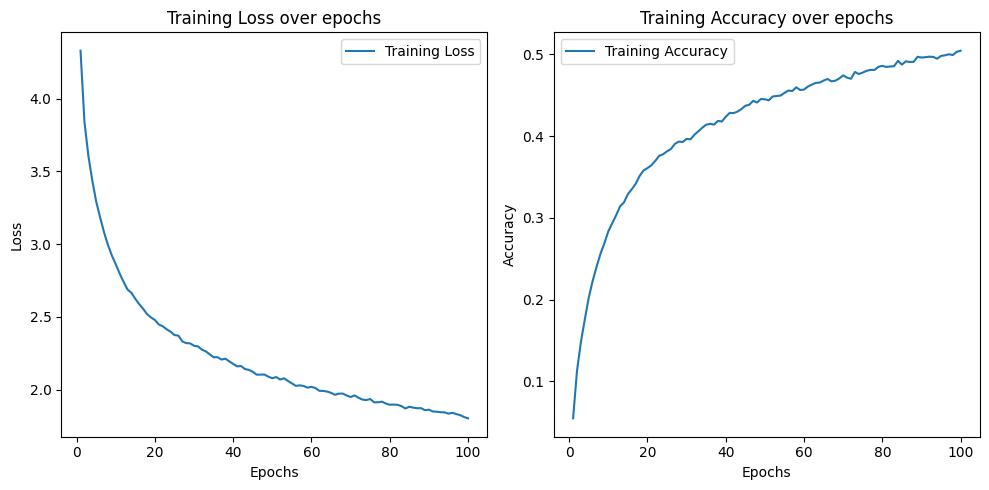

In [14]:
plt.figure(figsize=(10, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over epochs')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over epochs')
plt.legend()

plt.tight_layout()
plt.show()


### 4-3. Evaluation **(주석 내에 코드를 작성하세요)**

아래에 본인의 모델을 CIFAR-100의 `test` dataset으로 정확도를 평가하고 출력하는 코드를 작성하세요.

In [17]:
# Write your code here

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in train_loader:

        inputs, labels = inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the', total, f'test images: {accuracy:.2f}%')


Accuracy of the model on the 10000 test images: 58.79%


In [20]:
# Write your code here

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:

        inputs, labels = inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the', total, f'test images: {accuracy:.2f}%')


Accuracy of the model on the 10000 test images: 48.68%


In [21]:
# Write your code here
torch.cuda.empty_cache()
# 모델과 손실 함수, 옵티마이저 정의
device = torch.device("cuda")
model = Your_Model().to(device)  # 모델을 GPU로 이동
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 설정
num_epochs = 100

train_losses, train_accuracies = train_model(model, criterion, optimizer, train_loader, num_epochs)


Epoch [1/100], Loss: 4.3454, Accuracy: 0.0398
Epoch [2/100], Loss: 3.9002, Accuracy: 0.0886
Epoch [3/100], Loss: 3.6713, Accuracy: 0.1194
Epoch [4/100], Loss: 3.4919, Accuracy: 0.1486
Epoch [5/100], Loss: 3.3251, Accuracy: 0.1800
Epoch [6/100], Loss: 3.1511, Accuracy: 0.2104
Epoch [7/100], Loss: 3.0118, Accuracy: 0.2373
Epoch [8/100], Loss: 2.8955, Accuracy: 0.2596
Epoch [9/100], Loss: 2.7827, Accuracy: 0.2832
Epoch [10/100], Loss: 2.6615, Accuracy: 0.3080
Epoch [11/100], Loss: 2.5674, Accuracy: 0.3255
Epoch [12/100], Loss: 2.5237, Accuracy: 0.3364
Epoch [13/100], Loss: 2.4449, Accuracy: 0.3528
Epoch [14/100], Loss: 2.3905, Accuracy: 0.3661
Epoch [15/100], Loss: 2.3114, Accuracy: 0.3807
Epoch [16/100], Loss: 2.2706, Accuracy: 0.3908
Epoch [17/100], Loss: 2.2161, Accuracy: 0.4046
Epoch [18/100], Loss: 2.1696, Accuracy: 0.4135
Epoch [19/100], Loss: 2.1245, Accuracy: 0.4237
Epoch [20/100], Loss: 2.0726, Accuracy: 0.4339
Epoch [21/100], Loss: 2.0379, Accuracy: 0.4454
Epoch [22/100], Loss: 

In [22]:
# Write your code here

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in train_loader:

        inputs, labels = inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the 10000 test images: {accuracy:.2f}%')


Accuracy of the model on the 10000 test images: 77.74%


In [23]:
# Write your code here

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:

        inputs, labels = inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the', total, f'test images: {accuracy:.2f}%')


Accuracy of the model on the 10000 test images: 58.53%
